# Predicting Customer Churn in Banking: Balancing Accuracy and Retention

## Table of Content
* [Introduction](#introduction)
* [Import Library and Data](#import-libary-and-data)
    * [Import Library](#import-library)
    * [Import Data](#import-data)
* [Data Preprocessing](#data-preprocessing)
    * [General Data Information](#general-data-information)
    * [Missing Value](#missing-value)
    * [Check Class Imbalance](#check-class-imbalance)
* [Train Model with Imbalance Class](#train-model-with-imbalance-class)
* [Train Model with Balanced Class](#train-model-with-balanced-class)
* [Model Performance Comparison](#model-performance-comparison)
* [Conclusion](#conclusion)

## Introduction

Facing a decline in customer numbers, Bank Beta prioritizes customer retention over acquiring new ones to cut costs. The challenge is to predict whether a customer is likely to leave. Using historical data on customer behavior and termination records, the goal is to develop a predictive model with the highest possible F1 score. Success requires achieving a minimum F1 score of 0.59 on the test dataset. Following model development, any necessary adjustments will be made, and the revised work will undergo a second review. Additionally, the project includes evaluating the AUC-ROC metric and comparing it with the F1 score to comprehensively assess the model's ability to predict customer churn.

## Import Libary and Data

### Import Library

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, f1_score, roc_auc_score
from imblearn.over_sampling import SMOTE

### Import Data

In [2]:
data = pd.read_csv('Churn.csv')

## Data Preprocessing

### General Data Information

In [3]:
data.info()

data.sample(10)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
3854,3855,15580935,Okechukwu,687,Germany,Male,33,NaN,135962.40,2,1,0,121747.96,0
9952,9953,15696355,Cleveland,724,Germany,Male,37,6.0,125489.40,1,1,0,118570.53,0
1556,1557,15772777,Onyemachukwu,850,Spain,Female,29,10.0,0.00,2,1,1,94815.04,0
8931,8932,15761487,Yefimova,678,France,Female,55,NaN,0.00,1,0,1,196794.11,1
5687,5688,15691840,Fraser,505,Germany,Female,37,6.0,159863.90,2,0,1,125307.87,0
9033,9034,15586029,Davis,806,Germany,Male,34,2.0,96152.68,2,1,0,143711.02,0
5901,5902,15712930,Duncan,587,France,Male,42,1.0,0.00,1,0,0,123006.91,0
485,486,15637954,Lewis,730,France,Female,35,0.0,155470.55,1,1,1,53718.28,0
8584,8585,15732967,Cremonesi,731,France,Male,19,6.0,0.00,2,1,1,151581.79,0
5737,5738,15575428,Mistry,682,Germany,Female,35,2.0,117438.92,2,1,1,16910.98,0


### Missing Value

In [4]:
data.isnull().sum()

RowNumber            0
CustomerId           0
Surname              0
CreditScore          0
Geography            0
Gender               0
Age                  0
Tenure             909
Balance              0
NumOfProducts        0
HasCrCard            0
IsActiveMember       0
EstimatedSalary      0
Exited               0
dtype: int64

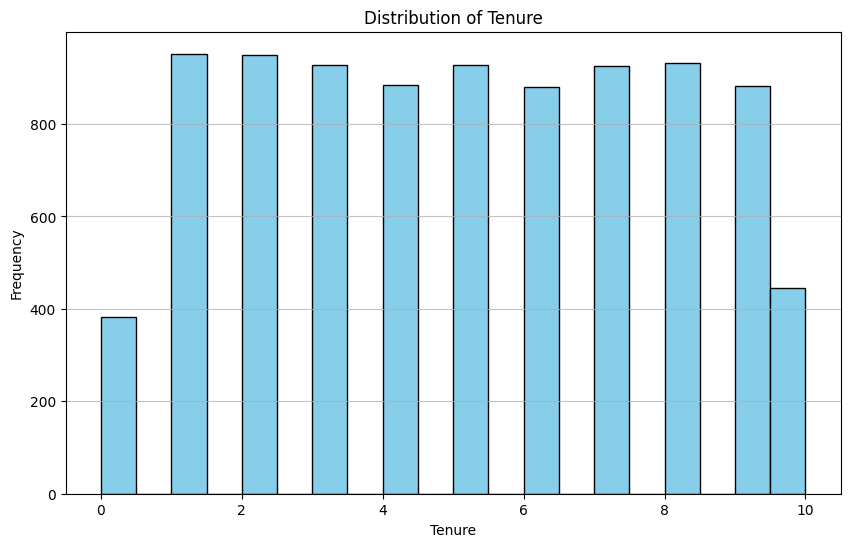

count    9091.000000
mean        4.997690
std         2.894723
min         0.000000
25%         2.000000
50%         5.000000
75%         7.000000
max        10.000000
Name: Tenure, dtype: float64


In [5]:

plt.figure(figsize=(10, 6))
plt.hist(data['Tenure'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Tenure')
plt.xlabel('Tenure')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

tenure_statistics = data['Tenure'].describe()
print(tenure_statistics)

Since the distribution of the column `Tenure` is approcimately normal and not having outlier value, the imputation of the missing value can be using `mean` value as the replacement. 

In [6]:
mean_tenure = data['Tenure'].mean()
data['Tenure'].fillna(mean_tenure, inplace=True)

In [7]:
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

### Check Class Imbalance

In [8]:
class_balance = data['Exited'].value_counts()
print("Class Balance:\n", class_balance)

Class Balance:
 0    7963
1    2037
Name: Exited, dtype: int64


## Train Model with Imbalance Class

Split the data into feature and target [y, 'Exited']

In [9]:
x_baseline = data.drop(['Exited', 'RowNumber', 'CustomerId', 'Surname', 'Geography', 'Gender'], axis=1)
y_baseline = data['Exited']

Split data into training and validation set

In [10]:
x_train_baseline, x_val_baseline, y_train_baseline, y_val_baseline = train_test_split(x_baseline, y_baseline, test_size=0.2, random_state=42)

Initialize Model [Random Forest Classifier] on the imbalance class data

In [11]:
baseline_model = RandomForestClassifier(random_state=42)
baseline_model.fit(x_train_baseline, y_train_baseline)

RandomForestClassifier(random_state=42)

Prediction on validation set

In [12]:
y_pred_val_baseline = baseline_model.predict(x_val_baseline)

Evaluate the model performance

In [13]:
print("Classification Report (Baseline Model):\n", classification_report(y_val_baseline, y_pred_val_baseline))
print("F1 Score (Baseline Model):", f1_score(y_val_baseline, y_pred_val_baseline))
print("AUC-ROC Score (Baseline Model):", roc_auc_score(y_val_baseline, y_pred_val_baseline))

Classification Report (Baseline Model):
               precision    recall  f1-score   support

           0       0.87      0.96      0.92      1607
           1       0.74      0.43      0.54       393

    accuracy                           0.86      2000
   macro avg       0.81      0.70      0.73      2000
weighted avg       0.85      0.86      0.84      2000

F1 Score (Baseline Model): 0.5428109854604201
AUC-ROC Score (Baseline Model): 0.6956944094776194


The baseline model shows that when predicting customers who won't leave the bank, it is accurate 87% of the time, but it misses nearly 60% of those who actually do leave. The overall accuracy is 86%, but the model struggles with finding customers who exit. The F1-score, a measure of overall effectiveness, is moderate at 54%. The model's ability to distinguish between customers who exit and those who don't is modest, with an AUC-ROC score of 70%. These results highlight the challenge of predicting exits due to the imbalanced nature of the dataset, where most customers stay. The model's performance can likely be improved with techniques designed to handle imbalanced classes, setting the stage for further refinements.

## Train Model with Balanced Class

Split the data into feature and target [y, 'Exited']

In [14]:
x_imbalanced = data.drop(['Exited', 'RowNumber', 'CustomerId', 'Surname', 'Geography', 'Gender'], axis=1)
y_imbalanced = data['Exited']

Split data into training and validation set

In [15]:
x_train_imbalanced, x_val_imbalanced, y_train_imbalanced, y_val_imbalanced = train_test_split(x_imbalanced, y_imbalanced, test_size=0.2, random_state=42)

Implementing SMOTE to handle oversampling

In [16]:
smote_imbalanced = SMOTE(random_state=42)
x_train_smote_imbalanced, y_train_smote_imbalanced = smote_imbalanced.fit_resample(x_train_imbalanced, y_train_imbalanced)

In [17]:
class_balance_after_smote = pd.Series(y_train_smote_imbalanced).value_counts()
print("Class Balance After SMOTE:\n", class_balance_after_smote)

Class Balance After SMOTE:
 0    6356
1    6356
Name: Exited, dtype: int64


Initialize Model [Random Forest Classifier] on the balanced class data

In [18]:
model_smote_imbalanced = RandomForestClassifier(random_state=42)
model_smote_imbalanced.fit(x_train_smote_imbalanced, y_train_smote_imbalanced)

RandomForestClassifier(random_state=42)

Prediction on validation set

In [19]:
y_pred_val_imbalanced = model_smote_imbalanced.predict(x_val_imbalanced)

Evaluate the model performance

In [20]:
print("Classification Report (SMOTE Model - Imbalanced Data):\n", classification_report(y_val_imbalanced, y_pred_val_imbalanced))
print("F1 Score (SMOTE Model - Imbalanced Data):", f1_score(y_val_imbalanced, y_pred_val_imbalanced))
print("AUC-ROC Score (SMOTE Model - Imbalanced Data):", roc_auc_score(y_val_imbalanced, y_pred_val_imbalanced))

Classification Report (SMOTE Model - Imbalanced Data):
               precision    recall  f1-score   support

           0       0.90      0.87      0.88      1607
           1       0.53      0.58      0.55       393

    accuracy                           0.81      2000
   macro avg       0.71      0.73      0.72      2000
weighted avg       0.82      0.81      0.82      2000

F1 Score (SMOTE Model - Imbalanced Data): 0.5524728588661038
AUC-ROC Score (SMOTE Model - Imbalanced Data): 0.7269428755555767


After implementing SMOTE technique, which is used to handle the imbalance in the data for the churned value, now the model shows better performance than the initial model. When predicting customers who stay, it's correct about 90% of the time. It also does a better job at identifying customers who actually leave, capturing 58% of them. The overall accuracy is 81%, with a more balanced evaluation showing improved handling of the class imbalance. The model's ability to distinguish between customers who exit and those who stay is better, with an enhanced score of 73%. In summary, applying SMOTE has positively impacted the model's ability to predict customer churn by making it more balanced and effective.

## Model Performance Comparison

### Baseline Model (Original Data)
- F1 Score (Baseline Model): 0.5428
- AUC-ROC Score (Baseline Model): 0.6957

### SMOTE Model
- F1 Score (SMOTE Model): 0.5525
- AUC-ROC Score (SMOTE Model): 0.7269

### Performance Comparison
- F1 Score: 
    
    The F1 score for the model with SMOTE handling class imbalance is slightly higher than the baseline model. This suggests that the SMOTE model provides a better balance between precision and recall.

- AUC-ROC Score: 
    
    The AUC-ROC score for the model with SMOTE is also higher, indicating improved discrimination ability compared to the baseline model.

- Summary:
    
    Handling class imbalance using SMOTE has improved the overall performance of the model, as reflected in both F1 score and AUC-ROC score. The model with SMOTE shows better capability in capturing instances of the minority class (Exited), resulting in improved recall for class 1. The precision for class 1 is lower in the SMOTE model compared to the baseline, but this is a trade-off for achieving a better balance in F1 score.

## Conclusion

In conclusion, the analysis of the project involved addressing the initial dataset, which contained missing values in the 'Tenure' column. The missing values were imputed using the mean tenure value, given the normal distribution and absence of outliers in the column. The class imbalance in the 'Exited' variable was identified, with a significantly higher number of customers staying (class 0) compared to those leaving (class 1).

The baseline model, trained without addressing class imbalance, exhibited satisfactory overall accuracy at 86%. However, its effectiveness in predicting customer churn, particularly for those who exit, was modest, as indicated by an F1 score of 54%. The AUC-ROC score was 70%, suggesting room for improvement in distinguishing between the two classes.

To enhance the model's performance, the SMOTE technique was applied to balance the class distribution. After SMOTE implementation, the model demonstrated improved precision and recall for both classes, resulting in an enhanced F1 score of 55%. The AUC-ROC score also increased to 73%, reflecting a more balanced and effective prediction of customer churn.

In summary, addressing class imbalance through SMOTE positively impacted the model's ability to predict customer churn, highlighting the importance of considering data distribution in machine learning tasks.